<a href="https://colab.research.google.com/github/ArikusumaWardana/learning-ai/blob/main/Personality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/personality.zip -d Dataset

Archive:  /content/personality.zip
  inflating: Dataset/16P.csv         
  inflating: Dataset/16p-Mapping.txt  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv('/content/Dataset/16P.csv', encoding='latin-1')
dataset.head(3)

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ


In [ ]:

# Create a mapping of personality labels to numbers
personality_mapping = {
    'ESTJ': 0, 'ENTJ': 1, 'ESFJ': 2, 'ENFJ': 3, 'ISTJ': 4, 'ISFJ': 5,
    'INTJ': 6, 'INFJ': 7, 'ESTP': 8, 'ESFP': 9, 'ENTP': 10, 'ENFP': 11,
    'ISTP': 12, 'ISFP': 13, 'INTP': 14, 'INFP': 15
}

# Convert the 'Personality' column to numerical values
dataset['Personality'] = dataset['Personality'].map(personality_mapping)
dataset.head(3)

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,11
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,13
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,7


In [ ]:
x = dataset.drop(['Response Id', 'Personality'], axis=1)
y = dataset['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
svc = SVC()
rf = RandomForestClassifier()
lr = LinearRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lgr = LogisticRegression()

trained_svc = svc.fit(x_train, y_train)
trained_rf = rf.fit(x_train, y_train)
trained_lr = lr.fit(x_train, y_train)
trained_dtc = dtc.fit(x_train, y_train)
trained_knn = knn.fit(x_train, y_train)
trained_lgr = lgr.fit(x_train, y_train)

score_svc = trained_svc.score(x_test, y_test)
score_rf = trained_rf.score(x_test, y_test)
score_lr = trained_lr.score(x_test, y_test)
score_dtc = trained_dtc.score(x_test, y_test)
score_knn = trained_knn.score(x_test, y_test)
score_lgr = trained_lgr.score(x_test, y_test)

print("Hasil Score SVC: ", score_svc*100)
print("Hasil Score Random Forest: ", score_rf*100)
print("Hasil Score Linear Regression: ", score_lr*100)
print("Hasil Score Decision Tree Classifier: ", score_dtc*100)
print("Hasil Score K Neighbors Classifier: ", score_knn*100)
print("Hasil Score Logistic Regression: ", score_lgr*100)

Hasil Score SVC:  98.90833333333333
Hasil Score Random Forest:  97.39999999999999
Hasil Score Linear Regression:  33.945936396345246
Hasil Score Decision Tree Classifier:  64.45833333333333
Hasil Score K Neighbors Classifier:  98.96666666666667
Hasil Score Logistic Regression:  92.15833333333333


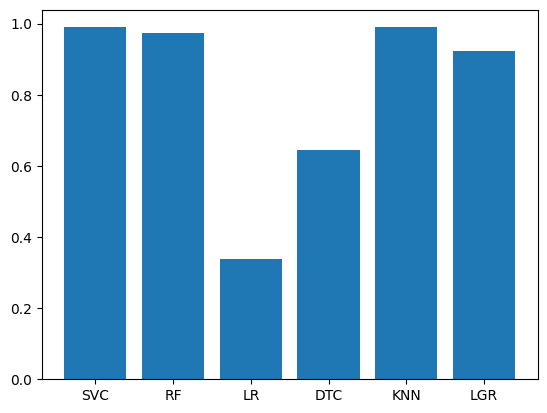

In [ ]:
x = np.array(["SVC", "RF", "LR", "DTC", "KNN", "LGR"])
y = np.array([score_svc, score_rf, score_lr, score_dtc, score_knn, score_lgr])

plt.bar(x, y)
plt.show()
